# QUARMEN EMJM - Machine Learning Exam 2024 
### David Jesús Árbol Guerrero

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import copy

from sklearn.metrics import accuracy_score, log_loss, mean_squared_error
from tqdm import tqdm

import pandas as pd

In atomic units we have that:
\begin{align*}
    a_0&=5.2917720859\cdot 10^{-11} \, m &=1\\
    m_e&=9.1093826\cdot 10^{-31} \, kg &=1 \\
    e&=1.60217653\cdot 10^{-19} \, C &=1 \\
    \hbar&=1.05457168\cdot 10^{-34} \, J\cdot s &=1 \\
    E_h&=4.35974417 \cdot 10^{-18}\, J &=1\\
    \frac{1}{4\pi\varepsilon_0}&=8.8987742438\cdot 10^9 \, \frac{Nm^2}{C^2} &=1\\
\end{align*}

So after some calculations we get that all the parameters in the problem are set to $1$ in atomic units:

\begin{align*}\
    m_e&=9.1093826\cdot 10^{-31} \, kg &=1 \\
    q&=1.60217653\cdot 10^{-19} \, C &=1 \\
    \hbar&=1.05457168\cdot 10^{-34} \, J\cdot s &=1 \\
    \omega&=219474 \, cm^{-1} &=1\\
    E_{field}&=5.14 \cdot 10^{11} \, \frac{V}{m} &=1\\
\end{align*}

In [2]:
#Constants in atomic units:

Efield=1
q=1
m=1
hbar=1
omega=1

## **Exercise 1:**
**Provide the energy of interaction between the charged particle and the electric field $E_{field}$.**

We can assume that the electric field is pointing towards the positive direction of $x$. Then, the force $F$ and the potential energy are related to the electric field as 
\begin{equation}
F=qE=-\frac{d}{dx}V
\end{equation}
So just integrating
\begin{equation}
V(x)=-Fx-U(0)=-qEx-V(0)
\end{equation}
And setting the energy origin to U(0)=0 we have
\begin{equation}
V(x)=-qEx
\end{equation}

This can be encoded in the python function _InteractionEnergy_ as follows:

In [3]:
def InteractionEnergy(x):
    return(-q*Efield*x)


## **Exercise 2:** 
**Use the python3 code developed during the tutorial sessions to compute the eigen-states of the particle. Report the associated energy values and plot the wave functions.**

I used a code that I did in class for a _general polynomial potential_. As we can set the energy origin to $V(0)=0$, we have a potential of the form:
\begin{equation}
V(x)=\frac{1}{2}\omega^2mx^2-qEx
\end{equation}
so it is polynomial and I can use the code just adding the prior coefficients.

In [4]:
def GetEigenSystem(xmin,xmax,N,polyorder,c):
    
    assert(len(c)==polyorder+1, "Polynomial order mismatches the length of the coefficients vector")
    
    # PARAMETERS____________________________________________________________


    dx=(xmax-xmin)/N
    #N+1= Nº of x
    beta = 1/(dx**2)
    alpha = -0.5*beta

    #H,P,T_________________________________________________________________

    
    x = np.arange(xmin,xmax,dx) #NumpyArray desde -5 hasta 5 (sin contar el 5) en intervalos de dx
    T = np.zeros((N,N))    #Matriz de ceros NxN
    V = np.zeros((N,N))

        ##Define potential
    def pot(x):
        return (sum(c[i]*x**i for i in range(0,polyorder+1)))
    V1 = pot(x)

        ## FILLING MATRICES
    np.fill_diagonal(V, pot(x))   #Diagonal of matrix V with the vector pot
    np.fill_diagonal(T, beta)
    np.fill_diagonal(T[1:, :-1], alpha) #1: All but the first # :-1 All but the last ( 2-N ,1-(N-1) )
    np.fill_diagonal(T[:, 1:], alpha)
    H=T+V

        ##Finding eigenvalues
    eval, evec = np.linalg.eigh(H) 
    
    #Python gives the eigenvectors already normalised. Then: np.sum(|psi|**2*dx)=np.sum(|psi|**2)*dx=dx , and that should be 1 because we are normalising a function (integrating).
    evec=evec/(dx**0.5) #This is the true good normalisation of the wavefunction
    
    return(x,pot(x),V,T,H,evec,eval)





<>:3: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:3: SyntaxWarning: assertion is always true, perhaps remove parentheses?
C:\Users\David\AppData\Local\Temp\ipykernel_20064\2800278673.py:3: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(len(c)==polyorder+1, "Polynomial order mismatches the length of the coefficients vector")


Now, we use the function to solve the problem after we set the initialisation parameters. The input and output are described as:

INPUT:
- ```xmin```, ```xmax```: Minimum and maximum values of the variable x_ over which we set our problem and discretise it.
- ```N```: The continuous variable _x_ is discretised in ```N``` points, from ```xmin``` to ```xmax``` without including ```xmax```. 
- ```polyorder```: Order of the polynomial potential energy
- ```c```: Coefficients of the polynomial energy: $V(x)=c_0+c_1x+c_2x^2$

OUTPUT:
- ```x```: The discretised position: $x=(x_{min} \equiv x_0,x_1, ... , x_{2999} )$
- ```Vfunc```: Value of the potential energy in each point $x_i$
- ```V```, ```T``` and ```H```: Matrices associated to the potential energy, kinetic energy and total energy (hamiltonian) that describe the eigen-problem.
- ```evec```: Matrix of eigenvectors defined as: column _j_ presents the values of the _j_-eigenfunction. Each entry _i_ of it is its value in $x_i$ in each point 

In [5]:
xmin=-10
xmax=10
N=1000
polyorder=2

(x,Vfunc,V,T,H,evec,eval)=GetEigenSystem(xmin,xmax,N,polyorder,[0,-q*Efield,0.5*omega**2*m])


### Energy values
They are given by ```eval[0]```, ```eval[1]```, ... 
Some of them are presented here:

In [6]:
number=10
for i in range (number):
    print('Eigen-energy', i,':',eval[i])

Eigen-energy 0 : -1.250031241840227e-05
Eigen-energy 1 : 0.9999374971872438
Eigen-energy 2 : 1.999837489060692
Eigen-energy 3 : 2.9996874715558692
Eigen-energy 4 : 3.9994874409200447
Eigen-energy 5 : 4.999237393399703
Eigen-energy 6 : 5.998937325239883
Eigen-energy 7 : 6.99858723268513
Eigen-energy 8 : 7.998187111978481
Eigen-energy 9 : 8.997736959362978


### Plotting some eigenfunctions

We plot eigenfunctions of orders from $n=0$ to $n=9$. Note that actually the eigenfunctions must accomplish $\psi_n(x)\xrightarrow{x\rightarrow \infty} 0 $ but we are plotting $\psi_n(x)+E_{n}$ so we can see every eigenfunction clearly.

<>:5: SyntaxWarning: invalid escape sequence '\P'
<>:5: SyntaxWarning: invalid escape sequence '\P'
C:\Users\David\AppData\Local\Temp\ipykernel_20064\3730269400.py:5: SyntaxWarning: invalid escape sequence '\P'
  plt.plot(x,(evec[:, i]+eval[i]), label="$\Psi_"+ str(i)+"(x)$") #Plot of |psi|^2+ eval  (we put +eval so we can see it clearer)


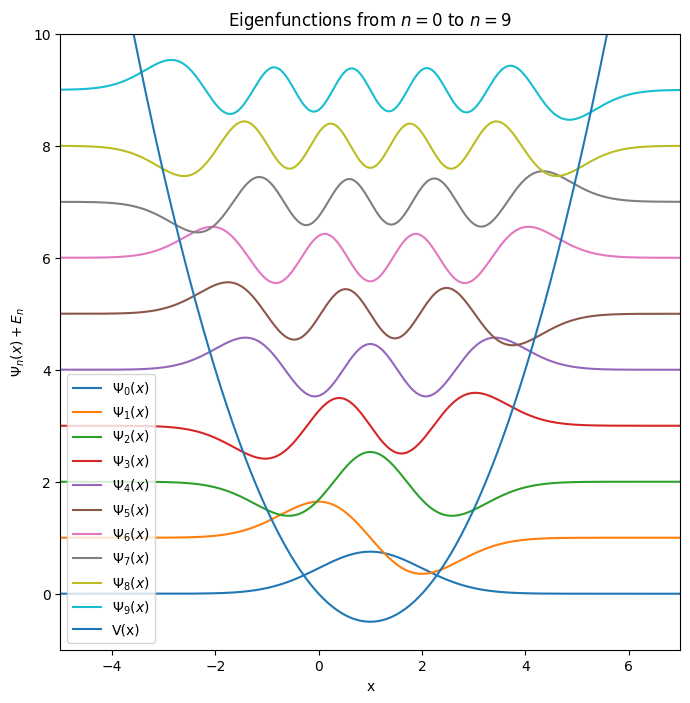

In [7]:
#Plotting eigenfunctions
plt.figure(figsize=(8,8))

for i in range(number):
    plt.plot(x,(evec[:, i]+eval[i]), label="$\Psi_"+ str(i)+"(x)$") #Plot of |psi|^2+ eval  (we put +eval so we can see it clearer)

plt.plot(x, Vfunc, label='V(x)') #Plot Potential


plt.ylabel(r'$\Psi_n(x)+E_n$')
plt.xlabel('x')
plt.xlim(xmin,xmax)

plt.xlim(-5,7)
plt.ylim(-1,10)

plt.title("Eigenfunctions from $n=0$ to $n=9$")
plt.legend()
plt.show()

# **Exercise 3**
**Compute the expected values of x, of the Hamiltonian H, of the momentum p. Compare (and
plot) these values with the ones obtained by a one-dimensional harmonic oscillator without
perturbation.**

If we add a linear perturbation to a quadratic potential well we are just displacing the potential in the right-left and up-down direction but the well does not change. For that reason, the eigenfunctions will remain the same but displaced in $x$, and the eigen-energies will increase summing just a constant that is the difference of height between the potentials. Then, we can predict the behaviours of \<X>, \<P> and \<H> by looking at the case of a harmonic oscillator.

We know that given an operator $A$:

\begin{equation}
    \langle A \rangle_\psi = \int \psi^*(x) \, A \, \psi(x)
\end{equation}

Then:
- **\<X>**: In a harmonic oscillator $\langle X \rangle_{\psi_{n}}=0\,$  $\forall n$ because it is a symmetric potential well centered at zero and the eigenfunctions are symmetric or antisymmetric. Then, if the potential is displaced in the right-left direction a quantity $x_{disp}$, the new expected value will be $\langle X \rangle_{\psi_{n}}=x_{disp}\,$  $\forall n$
- **\<P>**: In a harmonic oscillator we know that  $\langle P \rangle_{\psi_{n}}=0\,$  $\forall n$ for symmetry reasons and because it is a well potential where the particle is cofined. Then, if we displace the potential, the particle will be still confined (not moving in average) so still $\langle P \rangle_{\psi_{n}}=0\,$  $\forall n$.
- **\<H>**:  In a harmonic oscillator we know that  $\langle H \rangle_{\psi_{n}}=\hbar\omega(n+\frac{1}{2}),$  $\forall n$ so similarly to what happened with \<X>, as there is a displacement in the origin of energy of $E_{disp}\,$, we have that  $\langle H \rangle_{\psi_{n}}=\hbar\omega(n+\frac{1}{2})+E_{disp},$  $\forall n$

#### Calculation of \<X>, \<P>, \<H> (expectated values of position, momentum, energy)

### - \<X> \<P>:

In [8]:
#Calculation of dPsi/dx:    dPsi/dx[i]=  (  psi[i+1] - 2 psi[i]+ psi[i-1] ) / (dx)**2 so we use eigenvectors
#psi =  evec  #So psi[0] is the first eigenfunction
#P=np.zeros((N,N))
#np.fill_diagonal(P[1:,:-1],-1)
#np.fill_diagonal(P[:,1:],1)
#P=P/(2*dx)

#dpsi=P@psi

#       BUT THIS IS TOO INEFFICIENT TO COMPUTE !!!!!!!

In [9]:
#Other way more efficient
psi=evec
dx=(xmax-xmin)/N

psi1=copy.deepcopy(evec)
psi1=np.delete(psi1, 0, axis=0)
psi1=np.insert(psi1, N-1,0, axis=0)

psi2=copy.deepcopy(evec)
psi2=np.delete(psi2, N-1, axis=0)
psi2=np.insert(psi2, 0, 0, axis=0)

dpsi=1/(2*dx)*(psi1-psi2)


In [10]:
#Expectation values of X, P, H for each state y=0,1,2,...  (We omit -i in P)
exp_X_func = lambda y : np.sum(psi[:,y]*(x*psi[:,y]))*dx
exp_P_func = lambda y : np.sum(psi[:,y]*hbar*dpsi[:,y])*dx
exp_H_func = lambda y : np.sum(np.transpose(np.reshape(psi[:,y],(N,1)))@(H@(np.reshape(psi[:,y],(N,1))))*dx)

#### Plotting \<X>, \<P>, \<H> in function of n (order of the solution)

In [11]:
n=200 # <X>, <P> will be plotted for n=0,1,2, ... , n-1

exp_X = np.zeros(n)
exp_P = np.zeros(n)

for i in range(n):
        exp_X[i] = exp_X_func(i)
        exp_P[i] = exp_P_func(i)


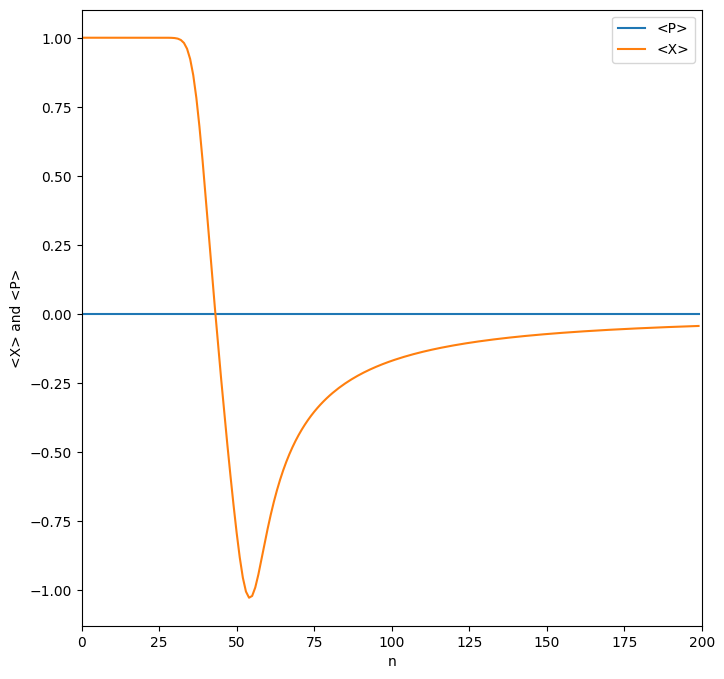

In [12]:
plt.figure(figsize=(8,8))
plt.plot(range(n), exp_P,label='<P>')
plt.plot(range(n), exp_X,label='<X>')


#plt.plot(n, exp_H, label='<H>')
plt.xlim(0,n)
plt.ylabel('<X> and <P>')
plt.xlabel('n')
plt.legend()
plt.show()

In [13]:
print(exp_X[0:37])

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.99999999 0.99999997 0.99999984
 0.99999929 0.99999707 0.9999888  0.9999599  0.99986592 0.99958161
 0.99878387 0.99671617 0.99179243 0.98109712 0.96007855 0.92300176
 0.86458657]


As we can see, we get what we expected from $n=0$ to $n=30$ but then $\langle X \rangle_{31}=0.996$ so we get anomalies from $n=31$ on. _We must only consider the results from $n=0$ to $n=30$ because the other cases have computational errors._ This is because we must consider a wider range of [ ```xmin```, ```xmax``` ]. For high values of $n$, the support of $\psi_n$ increases and if the support surpases [ ```xmin```, ```xmax``` ], then we will not be calculating correctly the integral to get the expected values. Because then we cannot consider the following approximation:
\begin{equation}
    \langle A \rangle_\psi = \int_{-\infty}^\infty \psi^*(x) \, A \, \psi(x)\approx \int_{-xmin}^{xmax} \psi^*(x) \, A \, \psi(x)
\end{equation}

Finally, the correct plot would be:

In [14]:
n=31 # <X>, <P> will be plotted for n=0,1,2, ... , n-1

exp_X = np.zeros(n)
exp_P = np.zeros(n)

for i in range(n):
        exp_X[i] = exp_X_func(i)
        exp_P[i] = exp_P_func(i)

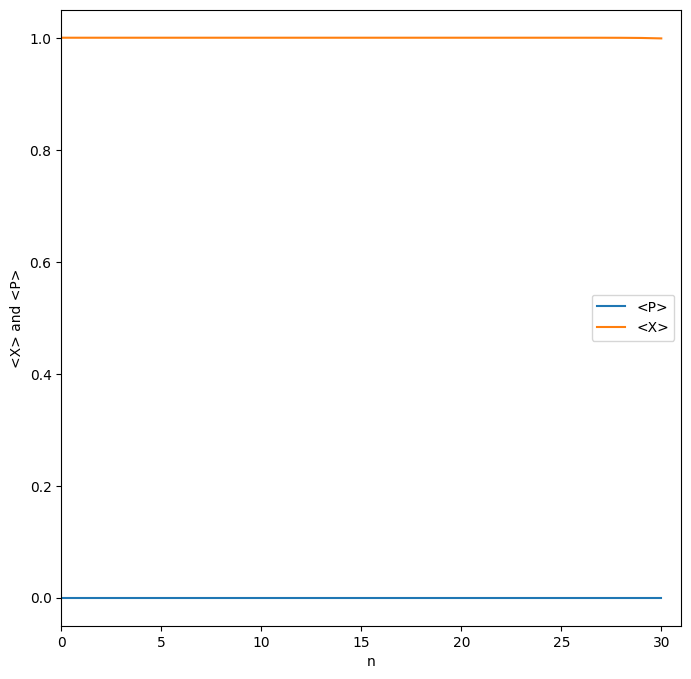

In [15]:
plt.figure(figsize=(8,8))
plt.plot(range(n), exp_P,label='<P>')
plt.plot(range(n), exp_X,label='<X>')


#plt.plot(n, exp_H, label='<H>')
plt.xlim(0,n)
plt.ylabel('<X> and <P>')
plt.xlabel('n')
plt.legend()
plt.show()

### - \<H>:

We have the same problem as with \<X> but now with the linear property of \<H> with $n$. \<H> should be linear with $n$  but that property remains up to $n=30$.

In [16]:
n=200 # <H> will be plotted for n=0,1,2, ... , n-1

exp_H = np.zeros(n)

for i in range(n):
        exp_H[i] = exp_H_func(i)

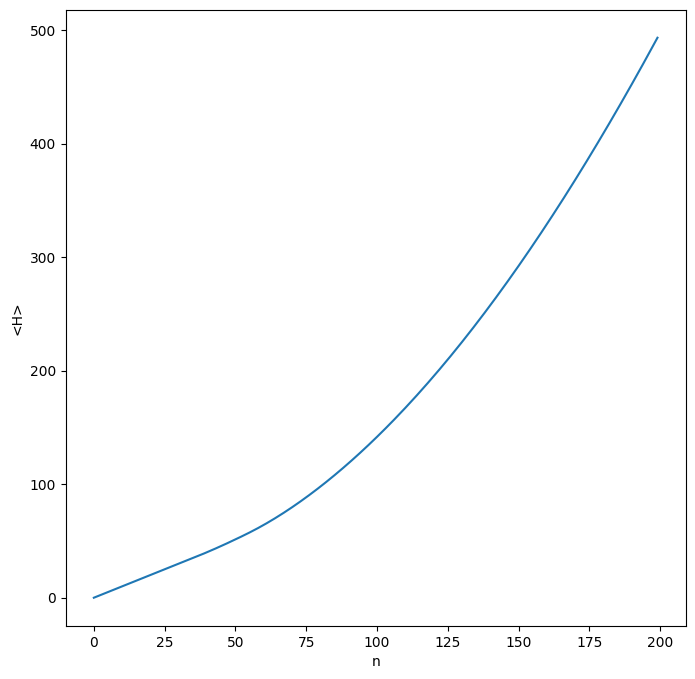

In [17]:
plt.figure(figsize=(8,8))
plt.plot(range(n), exp_H)

#plt.xlim(0,10)
#plt.ylim(0,10)

plt.ylabel('<H>')
plt.xlabel('n')
plt.show()

In [18]:
n=31 # <H> will be plotted for n=0,1,2, ... , n-1

exp_H = np.zeros(n)

for i in range(n):
        exp_H[i] = exp_H_func(i)

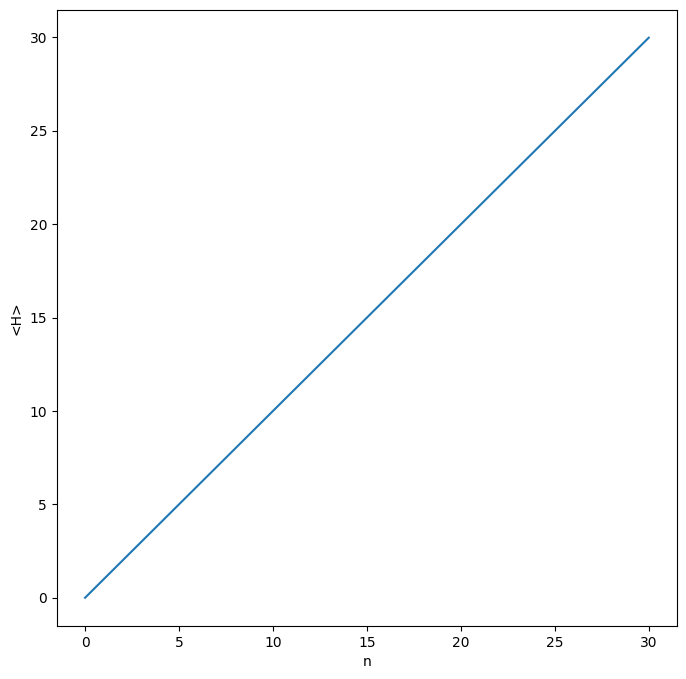

In [19]:
plt.figure(figsize=(8,8))
plt.plot(range(n), exp_H)

#plt.xlim(0,10)
#plt.ylim(0,10)

plt.ylabel('<H>')
plt.xlabel('n')
plt.show()

## Same results as in Exercises 2 and 3 for the case with no perturbation

In [20]:
xmin=-10
xmax=10
N=1000
polyorder=2

(x,Vfunc,V,T,H,evec,eval)=GetEigenSystem(xmin,xmax,N,polyorder,[0,0,0.5*omega**2*m])

### Energy values
They are given by eval[0], eval[1], ... 
Some of them are presented here:

In [21]:
number=10
for i in range (number):
    print('Eigen-energy', i,':',eval[i])

Eigen-energy 0 : 0.49998749968750966
Eigen-energy 1 : 1.4999374971871093
Eigen-energy 2 : 2.499837489060386
Eigen-energy 3 : 3.4996874715558537
Eigen-energy 4 : 4.4994874409200545
Eigen-energy 5 : 5.499237393399532
Eigen-energy 6 : 6.498937325239856
Eigen-energy 7 : 7.498587232685117
Eigen-energy 8 : 8.498187111978568
Eigen-energy 9 : 9.497736959362872


We observe that it fulfills $E_n=\hbar\omega(n+\frac{1}{2})$.

### Plotting some eigenfunctions

<>:5: SyntaxWarning: invalid escape sequence '\P'
<>:5: SyntaxWarning: invalid escape sequence '\P'
C:\Users\David\AppData\Local\Temp\ipykernel_20064\1904235110.py:5: SyntaxWarning: invalid escape sequence '\P'
  plt.plot(x,(evec[:, i]+eval[i]), label="$\Psi_"+ str(i)+"(x)$") #Plot of |psi|^2+ eval  (we put +eval so we can see it clearer)


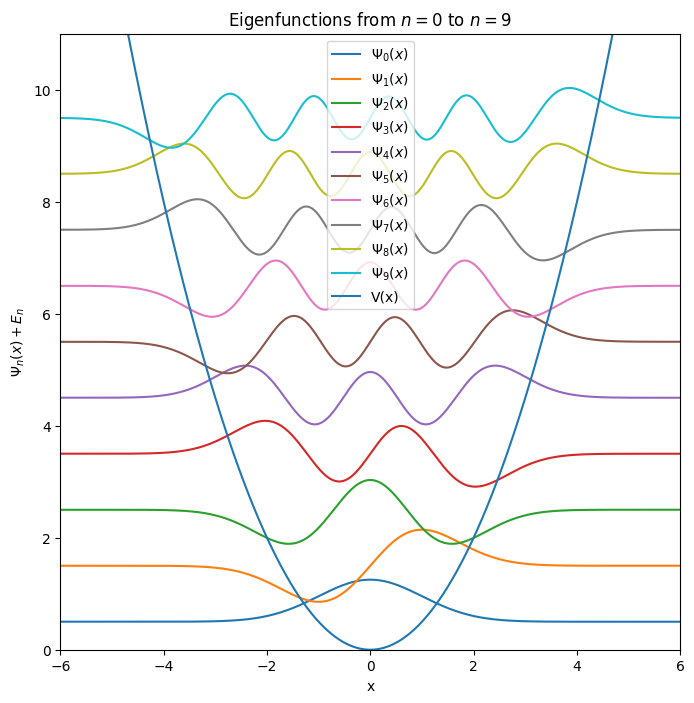

In [22]:
#Plotting eigenfunctions 0, 3, 6
plt.figure(figsize=(8,8))

for i in range(number):
    plt.plot(x,(evec[:, i]+eval[i]), label="$\Psi_"+ str(i)+"(x)$") #Plot of |psi|^2+ eval  (we put +eval so we can see it clearer)

plt.plot(x, Vfunc, label='V(x)') #Plot Potential


plt.ylabel(r'$\Psi_n(x)+E_n$')
plt.xlabel('x')
plt.xlim(xmin,xmax)

plt.xlim(-6,6)
plt.ylim(0,11)

plt.title("Eigenfunctions from $n=0$ to $n=9$")
plt.legend()
plt.show()

We see that we get the same but with the potential and eigenfunctions displaced in right-left and up-down according to the fact that the potential vertex is at $(\frac{-b}{2a}, V(\frac{-b}{2a}))$ for a potential of the form $V(x)=ax^2+bx+c$.

### Expectation values

In [23]:
#Other way more efficient
psi=evec
dx=(xmax-xmin)/N

psi1=copy.deepcopy(evec)
psi1=np.delete(psi1, 0, axis=0)
psi1=np.insert(psi1, N-1,0, axis=0)

psi2=copy.deepcopy(evec)
psi2=np.delete(psi2, N-1, axis=0)
psi2=np.insert(psi2, 0, 0, axis=0)

dpsi=1/(2*dx)*(psi1-psi2)


In [24]:
#Expectation values of X, P, H for each state y=0,1,2,...  (We omit -i in P)
exp_X_func = lambda y : np.sum(psi[:,y]*(x*psi[:,y]))*dx
exp_P_func = lambda y : np.sum(psi[:,y]*hbar*dpsi[:,y])*dx
exp_H_func = lambda y : np.sum(np.transpose(np.reshape(psi[:,y],(N,1)))@(H@(np.reshape(psi[:,y],(N,1))))*dx)

#### Plotting \<X>, \<P>, \<H> in function of n (order of the solution)

In [25]:
n=200 # <X>, <P>, <H> will be plotted for n=0,1,2, ... , n-1

exp_X = np.zeros(n)
exp_H = np.zeros(n)
exp_P = np.zeros(n)

for i in range(n):
        exp_X[i] = exp_X_func(i)
        exp_H[i] = exp_H_func(i)
        exp_P[i] = exp_P_func(i)

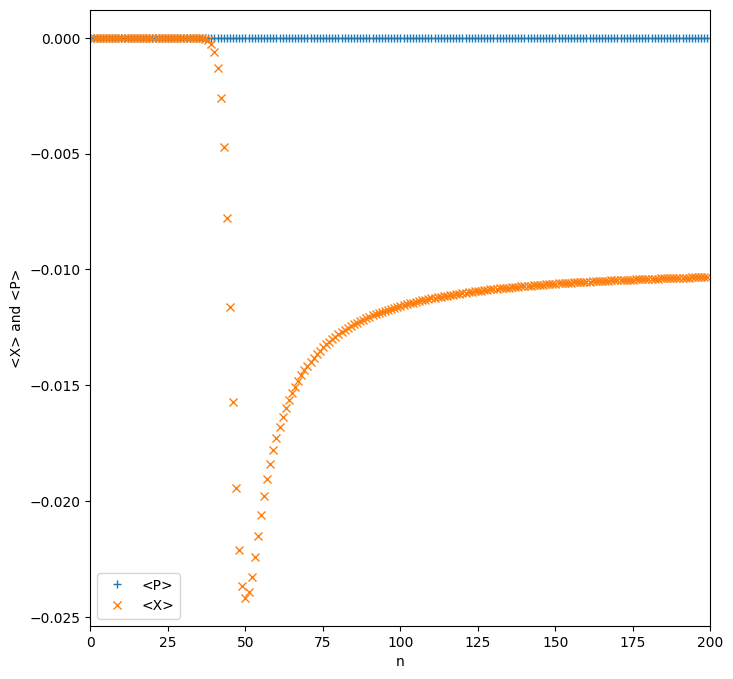

In [26]:
plt.figure(figsize=(8,8))
plt.plot(range(n), exp_P, '+',label='<P>')
plt.plot(range(n), exp_X, 'x',label='<X>')

#plt.plot(n, exp_H, label='<H>')
plt.xlim(0,n)
plt.ylabel('<X> and <P>')
plt.xlabel('n')
plt.legend()
plt.show()

We get the same behaviour save the fact that \<X>=0 now because the potential is centered at $x=0$.

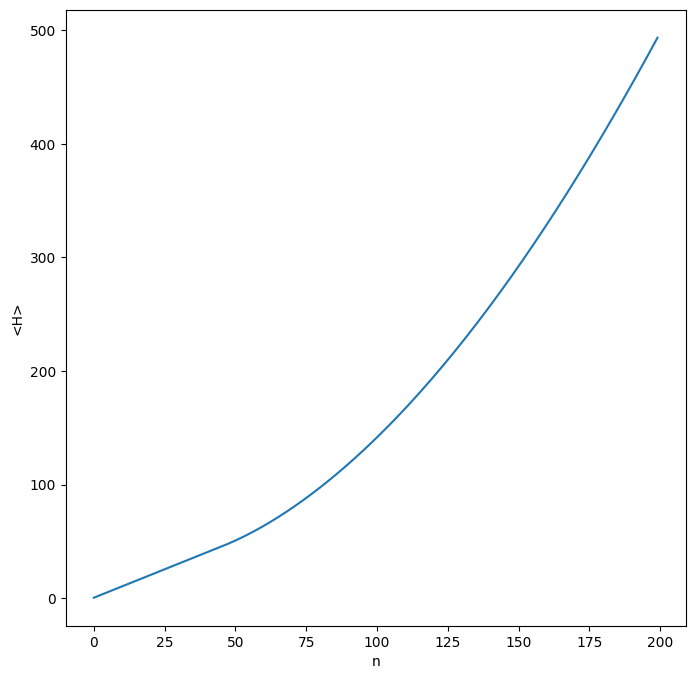

In [27]:
plt.figure(figsize=(8,8))
plt.plot(range(n), exp_H)

#plt.xlim(0,10)
#plt.ylim(0,10)

plt.ylabel('<H>')
plt.xlabel('n')
plt.show()

We get the same behaviour.

# **Exercise 4.**
**Construct a multi-layered feed-forward neural network NNθ capable to reproduce the wave functions computed for question 2.**

I used a dataset that consisted in many different second degree polynomial potentials with random $E_{field}$ and $\omega$ around the actual value for which we want to guess its wavefunction, $E_{field}=1$ and $\omega=1$. I trained the neural network and checked the guess for our case obtaining good results. 

I solved this exercises in two different ways. For the first way I used ```PyTorch``` libraries to train the neural network. Secondly, I used the code built in class that implemented a multilayer perceptron in an easy and intuitive way. Finally, I got that the guess for the first case was better because we can assume that ```PyTorch``` Functions are much more optimised.

## - Way 1: Using Pytorch

### Defining training dataset

<>:45: SyntaxWarning: invalid escape sequence '\p'
<>:47: SyntaxWarning: invalid escape sequence '\o'
<>:45: SyntaxWarning: invalid escape sequence '\p'
<>:47: SyntaxWarning: invalid escape sequence '\o'
C:\Users\David\AppData\Local\Temp\ipykernel_14048\3219912432.py:45: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel("$V(x)$ and $\psi(x)$")
C:\Users\David\AppData\Local\Temp\ipykernel_14048\3219912432.py:47: SyntaxWarning: invalid escape sequence '\o'
  plt.title('$\omega$'+str(j)+'='+str(omega_data[j])+'  '+'$E_{field}$'+'='+str(Efield_data[j]))
  0%|          | 0/1000 [00:00<?, ?it/s]

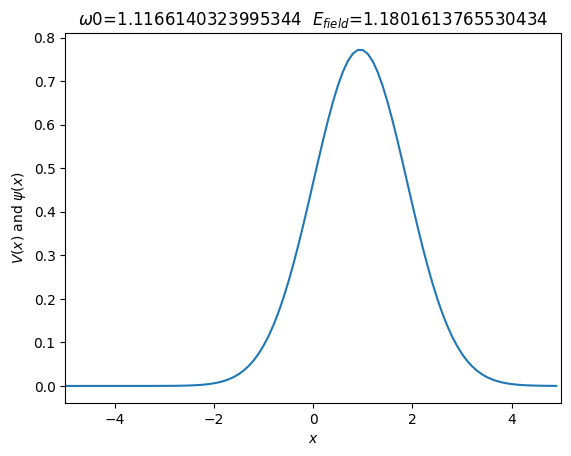

100%|██████████| 1000/1000 [00:02<00:00, 412.37it/s]


In [112]:
n_samples=1000
N=100
x_min=-5; 
x_max=5

#I choose max and min so the support of the eigenfunctions are in [xmin,xmax]
omega_min=0.8
omega_max=1.2

Efield_min=0.8
Efield_max=1.2

polyorder=2

#Each random constant
x0 = np.linspace(x_min,x_max,N)
omega_data = np.zeros(n_samples,float)
Efield_data = np.zeros(n_samples,float)

#Objects where I save dataset
V_data = np.zeros((N,n_samples),float)
psi_data = np.zeros((N,n_samples),float)
E_data= np.zeros(n_samples,float)


for j in tqdm(range(n_samples)):

    omega_data[j]=np.random.random()*(omega_max-omega_min)+omega_min
    Efield_data[j]=np.random.random()*(Efield_max-Efield_min)+Efield_min

    c=np.array([0, -q*Efield_data[j], 0.5*m*omega_data[j]**2])

    (x0,Vfunc0,V0,T0,H0,evec0,eval0) = GetEigenSystem(x_min,x_max,N,polyorder,c)
    
    E_data[j] = eval0[0] #from HO ground state

    for i in range(N):
        V_data[i,j] = Vfunc0[i]
        psi_data[i,j]= evec0[i,0]

    if j%1000==0:
        #plt.plot(x0, Vfunc0)
        plt.plot(x0, psi_data[:,j])
        plt.xlabel("$x$")
        plt.ylabel("$V(x)$ and $\psi(x)$")
        plt.xlim(x_min,x_max)
        plt.title('$\omega$'+str(j)+'='+str(omega_data[j])+'  '+'$E_{field}$'+'='+str(Efield_data[j]))
        plt.show()

### Training the neural network

In [114]:
import torch
torch.manual_seed(0)

In [115]:
'''[TODO] Create dataset'''
from sklearn.model_selection import train_test_split


X=torch.from_numpy(np.transpose(V_data).astype('float32'))
y=torch.from_numpy(np.transpose(psi_data).astype('float32'))



# split into train and test sets
# Hint: use the sklearn function `train_test_split`
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.7,     # 70% de los datos se utilizarán para entrenamiento (train_size=0.7). 
                                                    shuffle=False)       

In [116]:
from torch import nn
'''[TODO] Design MLP'''

fan_in = 100
h_theta = nn.Sequential(
    nn.Linear(N, fan_in),       # hidden layer 1 pre-activation
    nn.LeakyReLU(),                  # hidden layer 1 activation
    nn.Linear(fan_in, fan_in),  # hidden layer 2 pre-activation
    nn.LeakyReLU(),                  # hidden layer 2 activation
    nn.Linear(fan_in, fan_in),  # hidden layer 3 pre-activation
    nn.LeakyReLU(),                  # hidden layer 3 activation
    nn.Linear(fan_in, fan_in),  # hidden layer 4 pre-activation
    nn.LeakyReLU(),                  # hidden layer 4 activation
    nn.Linear(fan_in, N),       # output layer
    nn.Flatten()
)

In [117]:
'''[TODO] Optimization setup'''
# Define the loss function
loss_fn = nn.MSELoss()      #Minimum square error

# number of epochs          : Each epoch means a step in the minimisatuon. Each bactch is a try of minimisation with different data to and in each epoch we average in batch to get an epoch that is better steered
n_e = 2000

# batch size and batch per epochs
batch_size = 200
batches_per_epoch = len(X_train) // batch_size  #Dividing and truncating

# Optimizer: Adam es un algoritmo de optimización popular y eficaz que se utiliza para entrenar modelos de redes neuronales en PyTorch.
learning_rate = 0.0001
beta1 = 0.9 # Adam coefficients
beta2 = 0.999 # Adam coefficients
epsilon = 1e-8 # tolerance
optimizer = torch.optim.Adam(h_theta.parameters(),
                             lr = learning_rate,
                             betas=(beta1, beta2),
                             eps=epsilon)

In [118]:
'''[TODO] Train the hidden-layer MLP'''
import tqdm
train_loss_hist = []
test_loss_hist = []
for epoch in range(n_e):
    epoch_loss = []
    # set model in training mode
    h_theta.train()

    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar:
        bar.set_description(f"Epoch {epoch}")
        for i in bar:
            # take a batch
            start = i * batch_size
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # infer (forward)
            y_pred = h_theta(X_batch).squeeze()
            # compute the loss
            loss = loss_fn(y_pred, y_batch)
            # reset previously saved gradients and empty the optimizer memory
            optimizer.zero_grad()
            # run backward propagation
            loss.backward()
            # update weights
            optimizer.step()
            # compute and store metrics
            epoch_loss.append(float(loss))

    # set model in evaluation mode to infer the class in the test set
    # without storing gradients for brackprop
    h_theta.eval()
    # infer the class over the test set
    y_pred = h_theta(X_test).squeeze()
    acc = float(loss_fn(y_pred, y_test))
    train_loss_hist.append(np.mean(epoch_loss))
    test_loss_hist.append(acc)
    # print(f"Epoch {epoch} validation: MSE={acc:.1f}")

Epoch 1999: 100%|██████████| 3/3 [00:00<00:00, 92.07batch/s] 


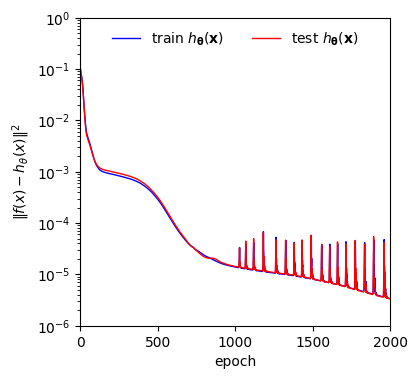

In [119]:
fig, ax = plt.subplots(figsize=(4,4))
ax.semilogy(train_loss_hist,
            color='b',
            linewidth=1,
            label=r"train $h_{\mathbf{\theta}}(\mathbf{x})$")
ax.semilogy(test_loss_hist,
            color='r',
            linewidth=1,
            label=r"test $h_{\mathbf{\theta}}(\mathbf{x})$")
ax.set_xlabel("epoch")
ax.set_ylabel(r"$\Vert f(x)-h_\theta(x) \Vert^2$")
ax.set_xlim(0,n_e)
ax.set_ylim(1e-6,1e0)
ax.legend(frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1.0),ncol=2,)
fig.savefig("mse_fx_compare.png", dpi=300, bbox_inches="tight")

We can see a good minimisation of the loss function that in this case is the MSE.

Now we plot the wavefunctions used for the training and the guessed function for the associated potential. We see that they fit very well.

<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\o'
<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\o'
C:\Users\David\AppData\Local\Temp\ipykernel_14048\1828110732.py:9: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel("$\psi(x)$")
C:\Users\David\AppData\Local\Temp\ipykernel_14048\1828110732.py:10: SyntaxWarning: invalid escape sequence '\o'
  plt.title('$\omega$'+str(j)+'='+str(omega_data[j+700])+'  '+'$E_{field}$'+'='+str(Efield_data[j+700]))


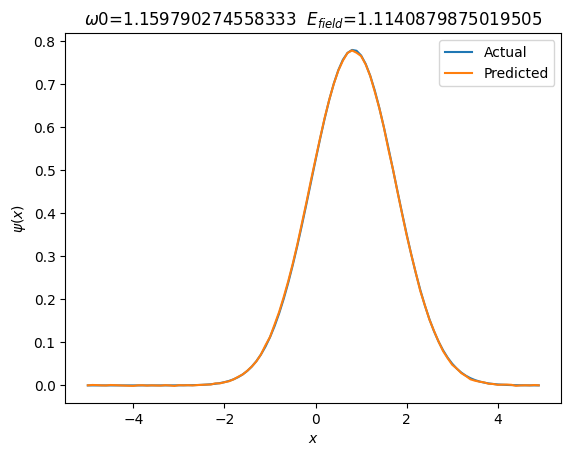

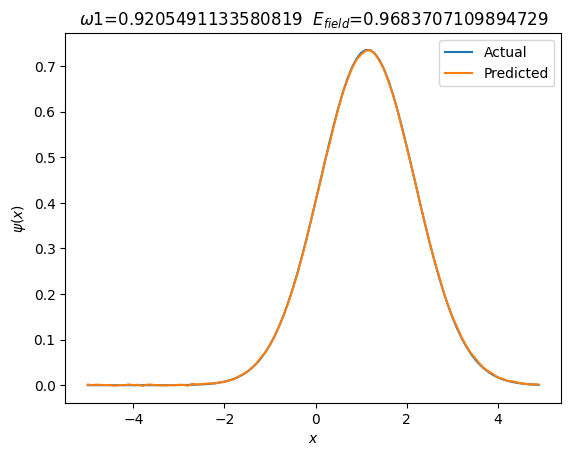

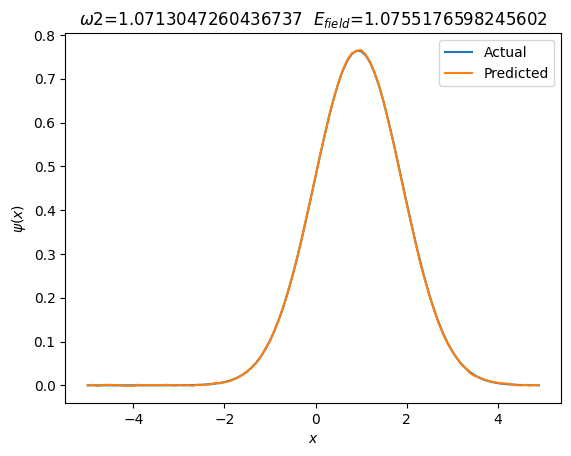

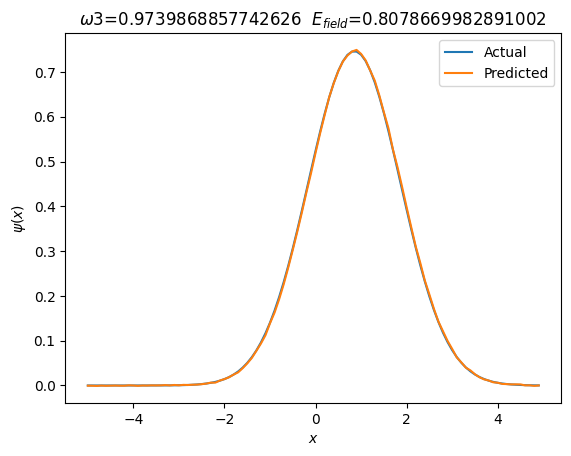

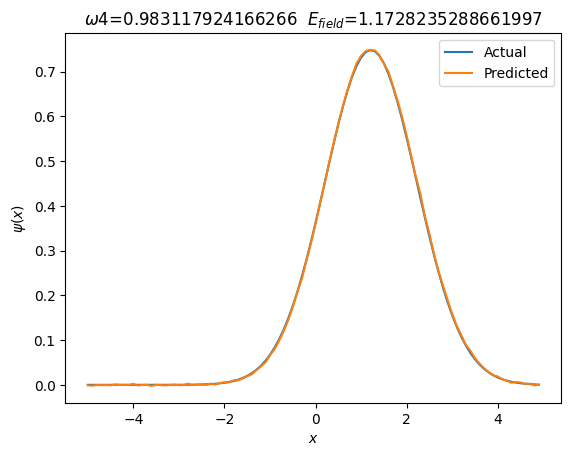

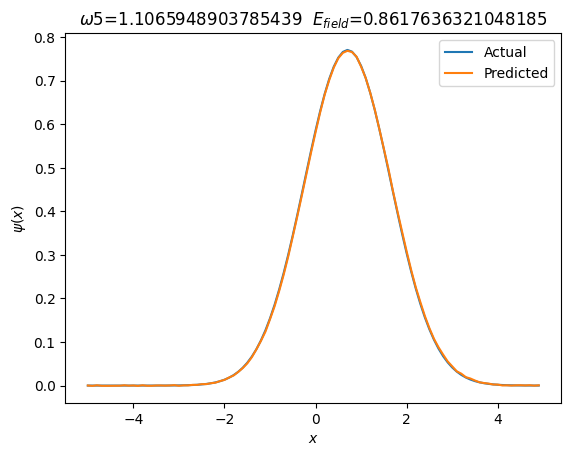

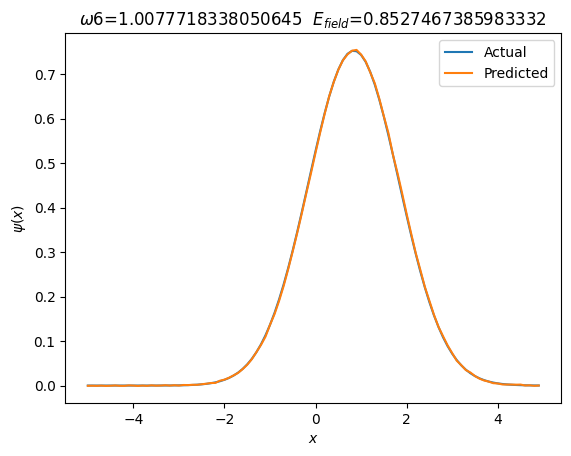

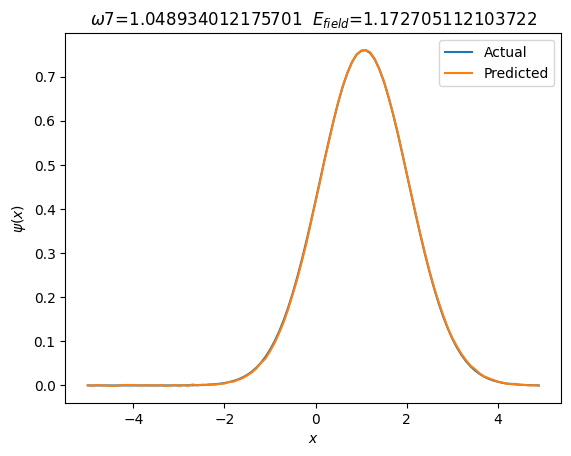

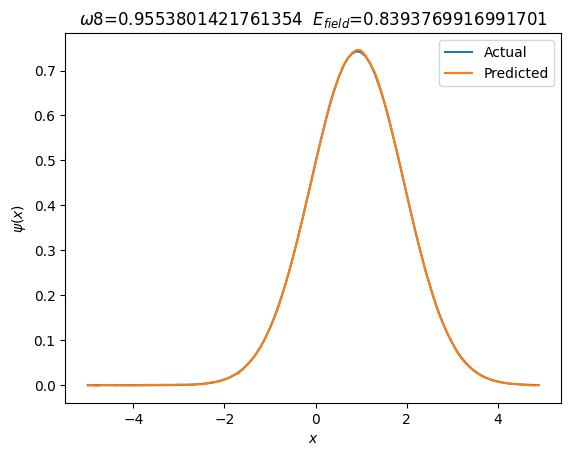

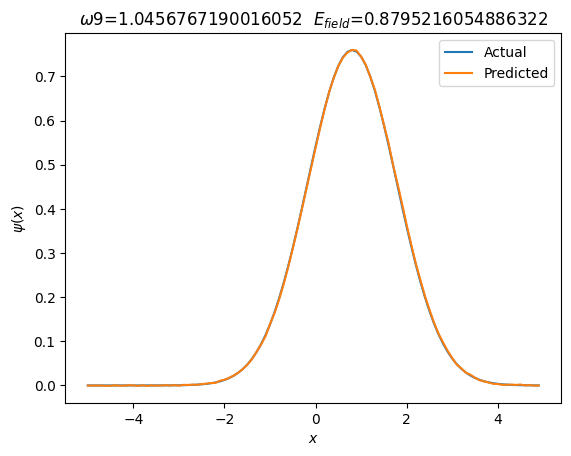

In [120]:
with np.errstate(divide='ignore', invalid='ignore', over='ignore'):
   
    for j in range(10):
        plt.subplots(1,1)
        plt.plot(x0, y_test.detach().numpy()[j,:], label='Actual')
        plt.plot(x0, y_pred.detach().numpy()[j,:], label='Predicted')
        
        plt.xlabel("$x$")
        plt.ylabel("$\psi(x)$")
        plt.title('$\omega$'+str(j)+'='+str(omega_data[j+700])+'  '+'$E_{field}$'+'='+str(Efield_data[j+700]))

        #plt.xlim((-1,1))
        plt.legend()
        plt.show() 

Now we check if our initial potential from question 2 gets a good guessed wavefunction by plotting the actual and guessed one.

In [121]:
Efield=1
q=1
m=1
hbar=1
omega=1

In [122]:
xmin=-5
xmax=5
N=100
x = np.linspace(x_min,x_max,N)
polyorder=2

(x,Vfunc,V,T,H,evec,eval)=GetEigenSystem(xmin,xmax,N,polyorder,[0,-q*Efield,0.5*omega**2*m])

In [123]:
Vfunc=np.reshape(Vfunc, (1,N))
Vfunc=torch.from_numpy(Vfunc.astype('float32'))


In [124]:
# without storing gradients for brackprop
h_theta.eval()

# infer the class over the test set
y_q2 = h_theta(Vfunc)
#acc = float(loss_fn(y_pred, y_test))
#train_loss_hist.append(np.mean(epoch_loss))
#test_loss_hist.append(acc)
# print(f"Epoch {epoch} validation: MSE={acc:.1f}")


In [125]:
prueba=y_q2.detach().numpy().squeeze()
np.shape(prueba)


(100,)

<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\o'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\o'
C:\Users\David\AppData\Local\Temp\ipykernel_14048\4116984696.py:8: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel("$\psi(x)$")
C:\Users\David\AppData\Local\Temp\ipykernel_14048\4116984696.py:9: SyntaxWarning: invalid escape sequence '\o'
  plt.title('$\omega=1$ '+' $E_{field}=1$')


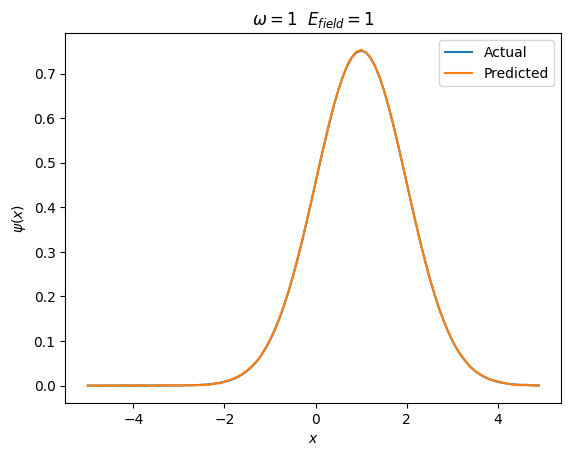

In [126]:

with np.errstate(divide='ignore', invalid='ignore', over='ignore'):
   
    plt.subplots(1,1)
    plt.plot(x0, evec[:, 0], label='Actual')
    plt.plot(x0, prueba, label='Predicted')
        
    plt.xlabel("$x$")
    plt.ylabel("$\psi(x)$")
    plt.title('$\omega=1$ '+' $E_{field}=1$')

    #plt.xlim((-1,1))
    plt.legend()
    plt.show() 

    

As we can see, it is very well predicted.

## - Way 2: Building the code

## Functions for neural network

In [56]:
#L= number of layers: We have layers from 0 to L. 0 and L have known dimensions
#dimensions: vector of integers with the number of neurons in each layer. Ex.: dim(0)= dimensions of the data; d(1)= nº of neuros in layer 1; ...; dim(L-1): all layers including first and last
     #NOTE: dim(L) is not defined because it has an only neuron

#W1, W2, W3 are the matrix of parameters for each layer

def initialization(dimensions): 

    parameters = {}
    L = len(dimensions)    # nº of layers
    
    for l in range(1,L):   #It does not include the first layer. It includes the last.
        parameters['W'+ str(l)]= np.random.randn(dimensions[l],dimensions[l-1])
        parameters['b'+ str(l)]= np.random.randn(dimensions[l],1)
        
    return parameters

In [ ]:
#A0: for the first layer 0 we only have data so A0=X
#A1, A2, A3 ... : activation matrices for each layers

def forward_propagation(X, parameters):

    activations = {'A0' : X}
    L= len(parameters) // 2      #Because we are working with 2D data so the parameters of each layer is a Ai matrix of 2 x m_{number of layer}

    for l in range(1,L+1):
        Z = parameters['W' + str(l)].dot(activations['A' + str(l-1)])+parameters['b' + str(l)]
        activations['A' + str(l)] = 1./ (1. + np.exp(-Z))

    return activations

In [ ]:
#y= labels, real classification of each point 
#activations= activations of the last forward_propagation using the last parameters
#parameters

#Now we optimise the parameters with the prior information, using the loss function seen in class: we get the gradients.

def back_propagation(y, activations, parameters):

    m = y.shape[1]

    L= len(parameters) // 2     #Because we are working with 2D data so the parameters of each layer is a matrix of 2 x m_{number of layer} and this gives the number of layers

    dZ = activations['A' + str(L)] - y
    gradients = {}
    
    for l in reversed(range(1,L+1)):
        gradients['dW' + str(l)] = 1/m *np.dot(dZ,activations['A' + str(l-1)].T)
        gradients['db' + str(l)] = 1/m * np.sum(dZ, axis=1, keepdims = True)
        
        if l>1:
            dZ=np.dot(parameters['W' + str(l)].T,dZ)*activations['A' + str(l-1)]*(1-activations['A' + str(l-1)])
            
    return gradients

In [ ]:
#We update the parameters using the last value and the gradients

def update(gradients, parameters, learning_rate):
    
    L= len(parameters) // 2    #Because we are working with 2D data so the parameters of each layer is a matrix of 2 x m_{number of layer}

    for l in range(1,L+1):
        parameters['W' + str(l)]= parameters['W' + str(l)]-learning_rate*gradients['dW' + str(l)]
        parameters['b' + str(l)]= parameters['b' + str(l)]-learning_rate*gradients['db' + str(l)]

    return parameters

In [60]:
#Prediction of the label 

def predict(X, parameters):
    activations = forward_propagation(X, parameters)
    L= len(parameters) // 2
    Af = activations['A' + str(L)]
    return Af >= 0.5

In [65]:
#costfunc: options that do:  0 - it uses the log loss function we saw in class  ;  1 - it uses the mean squared error as the loss function

def neural_network(X, y, hidden_layers = (16,16,16), learning_rate = 0.1, n_iter = 10000, costfunc=0):

    # parameter initialization
    np.random.seed(0)
    dimensions = list(hidden_layers)
    dimensions.insert(0,X.shape[0])
    dimensions.append(y.shape[0])       #So we have (nº neurons in layer 0, nn1, nn2, nn_last) (not only the hidden layers, but also first and last)
    
    parameters = initialization(dimensions) #n0,n1,n2, ...
   # print(dimensions)
    
    train_loss = []
    train_acc = []
    history = []

    # gradient descent
    for i_iter in tqdm(range(n_iter)):
        activations = forward_propagation(X, parameters)
        gradients = back_propagation( y, activations, parameters)
        parameters = update(gradients, parameters, learning_rate)

        if i_iter%10==0:
            L= len(parameters) // 2
            
            if(costfunc==0):
                train_loss.append(log_loss(y, activations['A' + str(L)]))
                y_pred = predict(X, parameters)
                current_accuracy = accuracy_score(y.flatten(), y_pred.flatten())
                train_acc.append(current_accuracy)
                 
            elif(costfunc==1):
                train_loss.append(mean_squared_error(y, activations['A' + str(L)]))

    if(costfunc==0):
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(train_loss, label='train loss')
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.plot(train_acc, label='train acc')
        plt.yscale('log')
        plt.legend()
        plt.show()

    elif(costfunc==1):
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(train_loss, label='train loss')
        plt.yscale('log')
        plt.legend()
        plt.show()
    
    return parameters

## Training with perturbed harmonic oscillator

<>:45: SyntaxWarning: invalid escape sequence '\p'
<>:47: SyntaxWarning: invalid escape sequence '\o'
<>:45: SyntaxWarning: invalid escape sequence '\p'
<>:47: SyntaxWarning: invalid escape sequence '\o'
C:\Users\David\AppData\Local\Temp\ipykernel_14048\3550972926.py:45: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel("$V(x)$ and $\psi(x)$")
C:\Users\David\AppData\Local\Temp\ipykernel_14048\3550972926.py:47: SyntaxWarning: invalid escape sequence '\o'
  plt.title('$\omega$'+str(j)+'='+str(omega_data[j])+'  '+'$E_{field}$'+'='+str(Efield_data[j]))
  0%|          | 0/100 [00:00<?, ?it/s]

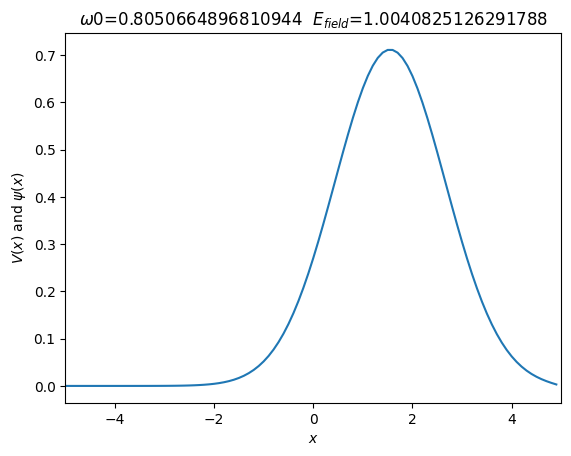

100%|██████████| 100/100 [00:00<00:00, 273.54it/s]


In [62]:
n_samples=100
N=100
x_min=-5; 
x_max=5

#I choose max and min so the support of the eigenfunctions are in [xmin,xmax]
omega_min=0.8
omega_max=1.2

Efield_min=0.8
Efield_max=1.2

polyorder=2

#Each random constant
x0 = np.linspace(x_min,x_max,N)
omega_data = np.zeros(n_samples,float)
Efield_data = np.zeros(n_samples,float)

#Objects where I save dataset
V_data = np.zeros((N,n_samples),float)
psi_data = np.zeros((N,n_samples),float)
E_data= np.zeros(n_samples,float)


for j in tqdm(range(n_samples)):

    omega_data[j]=np.random.random()*(omega_max-omega_min)+omega_min
    Efield_data[j]=np.random.random()*(Efield_max-Efield_min)+Efield_min

    c=np.array([0, -q*Efield_data[j], 0.5*m*omega_data[j]**2])

    (x0,Vfunc0,V0,T0,H0,evec0,eval0) = GetEigenSystem(x_min,x_max,N,polyorder,c)
    
    E_data[j] = eval0[0] #from HO ground state

    for i in range(N):
        V_data[i,j] = Vfunc0[i]
        psi_data[i,j]= evec0[i,0]

    if j%1000==0:
        #plt.plot(x0, Vfunc0)
        plt.plot(x0, psi_data[:,j])
        plt.xlabel("$x$")
        plt.ylabel("$V(x)$ and $\psi(x)$")
        plt.xlim(x_min,x_max)
        plt.title('$\omega$'+str(j)+'='+str(omega_data[j])+'  '+'$E_{field}$'+'='+str(Efield_data[j]))
        plt.show()

### Generating the dataset

<>:45: SyntaxWarning: invalid escape sequence '\p'
<>:47: SyntaxWarning: invalid escape sequence '\o'
<>:45: SyntaxWarning: invalid escape sequence '\p'
<>:47: SyntaxWarning: invalid escape sequence '\o'
C:\Users\David\AppData\Local\Temp\ipykernel_14048\2712529400.py:45: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel("$V(x)$ and $\psi(x)$")
C:\Users\David\AppData\Local\Temp\ipykernel_14048\2712529400.py:47: SyntaxWarning: invalid escape sequence '\o'
  plt.title('$\omega$'+str(j)+'='+str(omega_data[j])+'  '+'$E_{field}$'+'='+str(Efield_data[j]))
  0%|          | 0/100 [00:00<?, ?it/s]

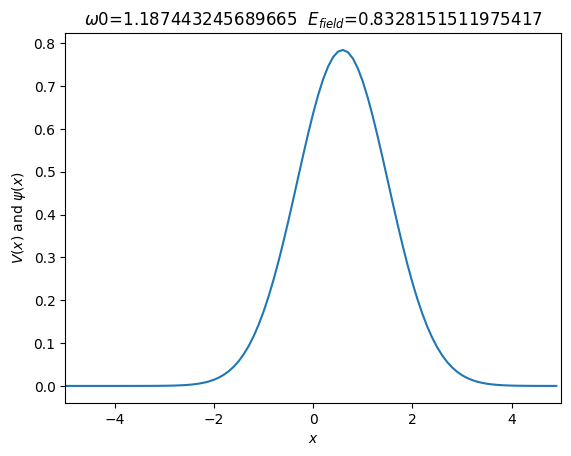

100%|██████████| 100/100 [00:00<00:00, 208.77it/s]


In [63]:
n_samples=100
N=100
x_min=-5
x_max=5

#I choose max and min so the support of the eigenfunctions are in [xmin,xmax]
omega_min=0.8
omega_max=1.2

Efield_min=0.8
Efield_max=1.2

polyorder=2

#Each random constant
x0 = np.linspace(x_min,x_max,N)
omega_data = np.zeros(n_samples,float)
Efield_data = np.zeros(n_samples,float)

#Objects where I save dataset
V_data = np.zeros((N,n_samples),float)
psi_data = np.zeros((N,n_samples),float)
E_data= np.zeros(n_samples,float)


for j in tqdm(range(n_samples)):

    omega_data[j]=np.random.random()*(omega_max-omega_min)+omega_min
    Efield_data[j]=np.random.random()*(Efield_max-Efield_min)+Efield_min

    c=np.array([0, -q*Efield_data[j], 0.5*m*omega_data[j]**2])

    (x0,Vfunc0,V0,T0,H0,evec0,eval0) = GetEigenSystem(x_min,x_max,N,polyorder,c)
    
    E_data[j] = eval0[0] #from HO ground state

    for i in range(N):
        V_data[i,j] = Vfunc0[i]
        psi_data[i,j]= evec0[i,0]

    if j%1000==0:
        #plt.plot(x0, Vfunc0)
        plt.plot(x0, psi_data[:,j])
        plt.xlabel("$x$")
        plt.ylabel("$V(x)$ and $\psi(x)$")
        plt.xlim(x_min,x_max)
        plt.title('$\omega$'+str(j)+'='+str(omega_data[j])+'  '+'$E_{field}$'+'='+str(Efield_data[j]))
        plt.show()

### Training process

100%|██████████| 100000/100000 [10:07<00:00, 164.73it/s]


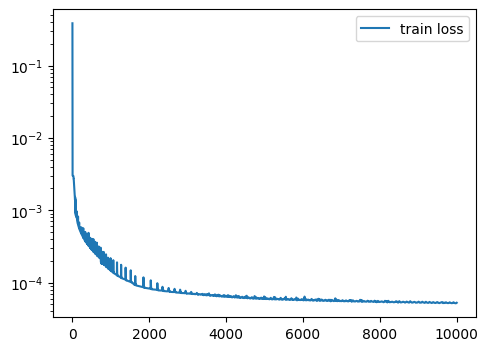

In [73]:
with np.errstate(divide='ignore', invalid='ignore', over='ignore'):  #This is to avoid some possible numerical errors in the computation
    params = neural_network(V_data, psi_data, hidden_layers = (100,100,100,100), learning_rate = 0.1, n_iter = 20000, costfunc =1)

Now we can see that, after training, we can reproduce the wavefunctions with which we trained the model easily.

<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\o'
C:\Users\David\AppData\Local\Temp\ipykernel_14048\320182829.py:7: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel("$\psi(x)$")
C:\Users\David\AppData\Local\Temp\ipykernel_14048\320182829.py:8: SyntaxWarning: invalid escape sequence '\o'
  plt.title('$\omega$'+str(j)+'='+str(omega_data[j])+'  '+'$E_{field}$'+'='+str(Efield_data[j]))


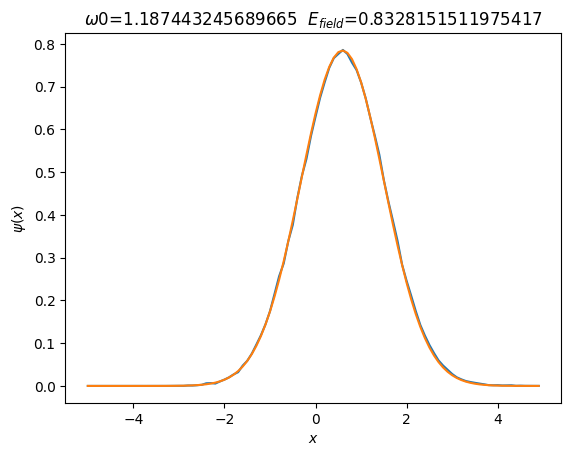

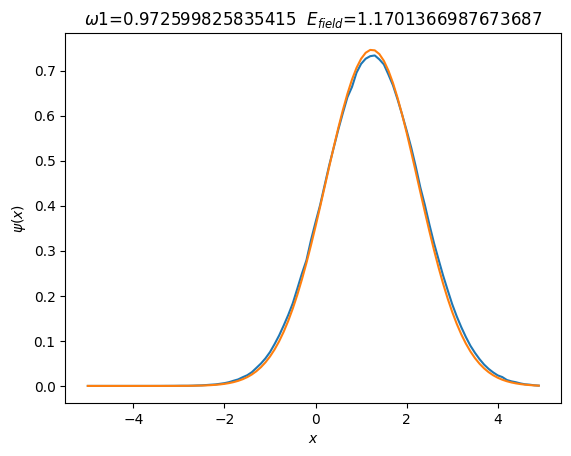

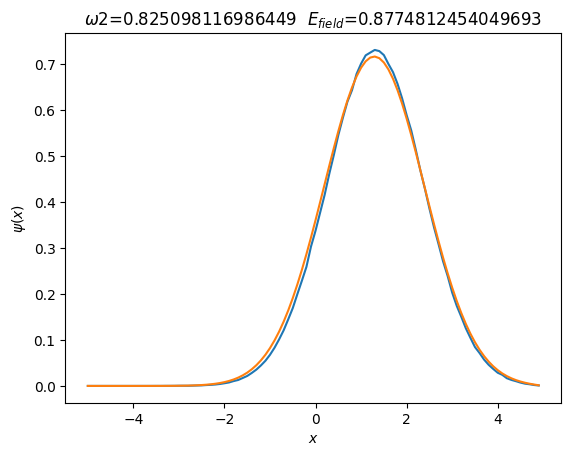

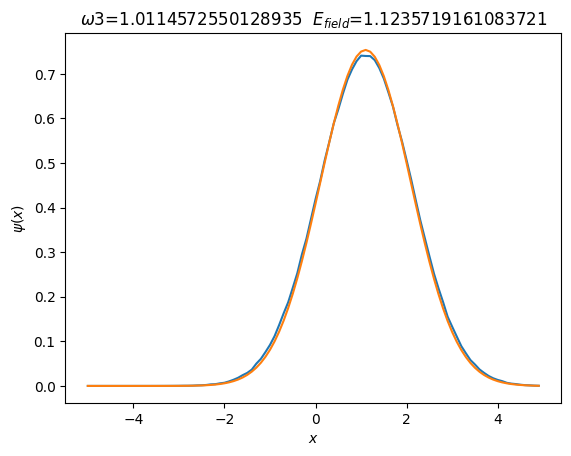

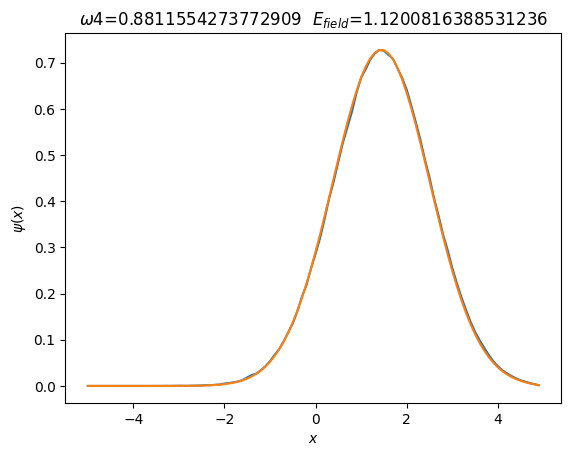

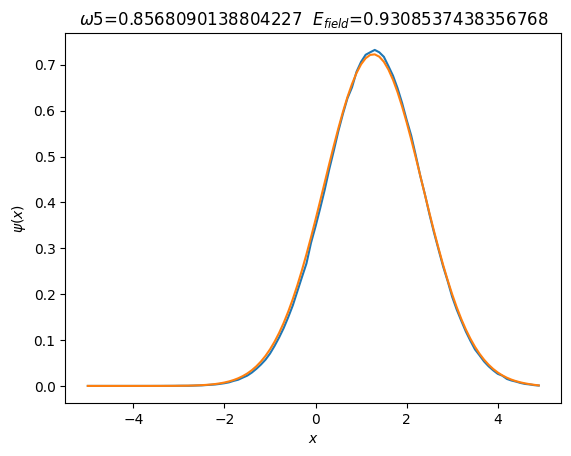

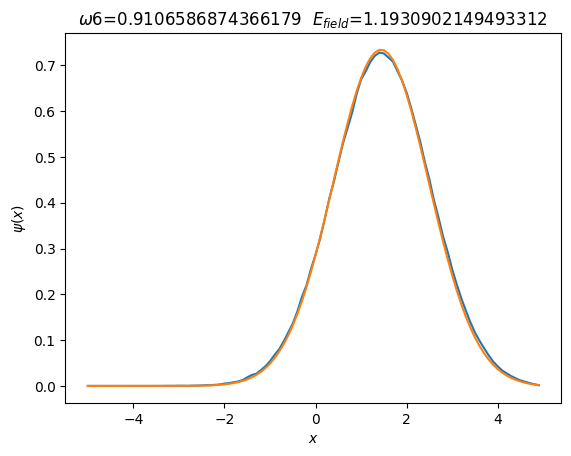

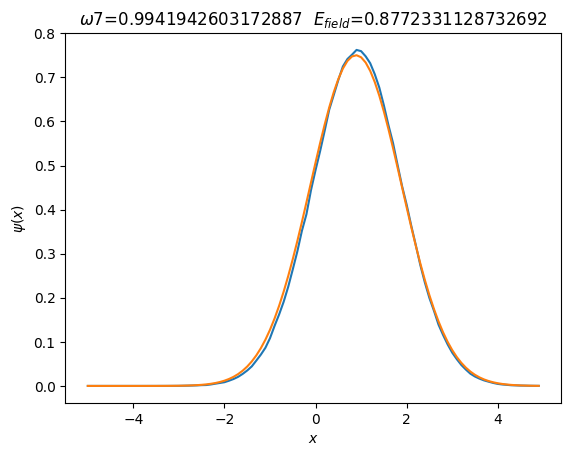

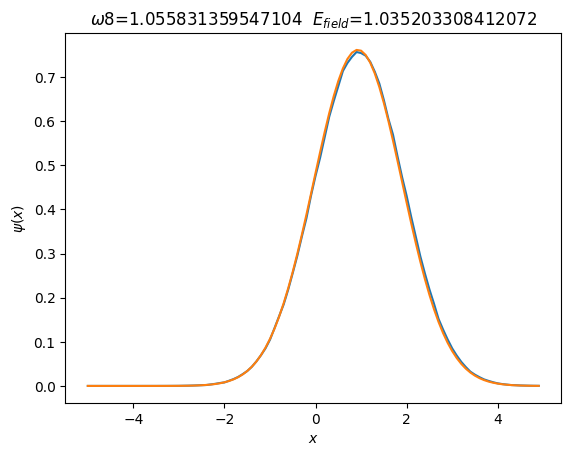

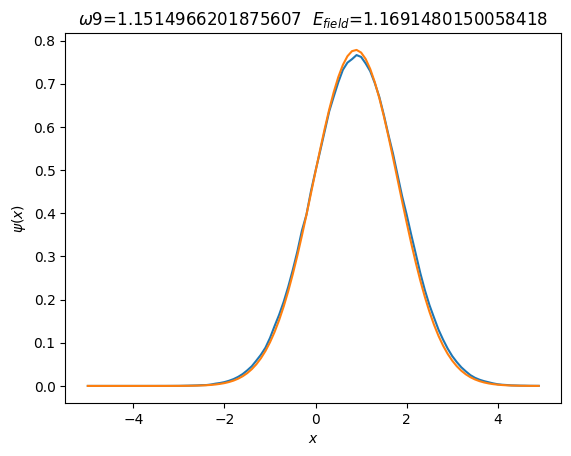

In [78]:
with np.errstate(divide='ignore', invalid='ignore', over='ignore'):
    for j in range(10):
        plt.subplots(1,1)
        plt.plot(x0, forward_propagation(V_data, params)['A5'][:,j])
        plt.plot(x0, psi_data[:,j])
        plt.xlabel("$x$")
        plt.ylabel("$\psi(x)$")
        plt.title('$\omega$'+str(j)+'='+str(omega_data[j])+'  '+'$E_{field}$'+'='+str(Efield_data[j]))

        #plt.xlim((-1,1))

        plt.show()    

### Reproducing wavefunctions in question 2

In [75]:
Efield=1
q=1
m=1
hbar=1
omega=1

In [76]:
xmin=-5
xmax=5
N=100
x = np.linspace(x_min,x_max,N)
polyorder=2

(x,Vfunc,V,T,H,evec,eval)=GetEigenSystem(xmin,xmax,N,polyorder,[0,-q*Efield,0.5*omega**2*m])

<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\o'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\o'
C:\Users\David\AppData\Local\Temp\ipykernel_14048\2398797414.py:8: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel("$\psi(x)$")
C:\Users\David\AppData\Local\Temp\ipykernel_14048\2398797414.py:12: SyntaxWarning: invalid escape sequence '\o'
  plt.title('$\omega=1$ '+' $E_{field}=1$')


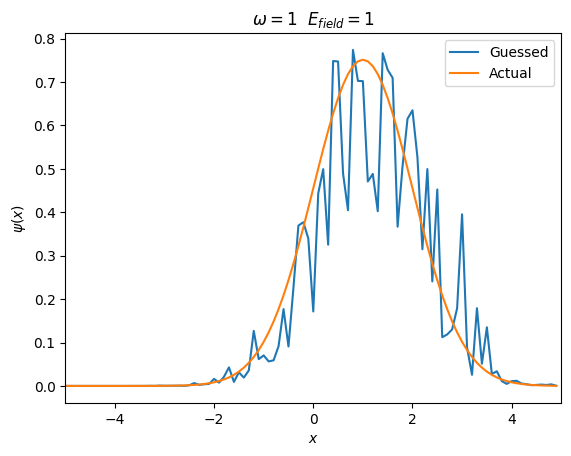

In [82]:
with np.errstate(divide='ignore', invalid='ignore', over='ignore'):
    plt.subplots(1,1)
    psi_guess=forward_propagation(Vfunc, params)['A5'][:,0]
    plt.plot(x, psi_guess, label='Guessed')
    plt.plot(x, evec[:,0], label='Actual')

    plt.xlabel("$x$")
    plt.ylabel("$\psi(x)$")

    plt.xlim((xmin,xmax))

    plt.title('$\omega=1$ '+' $E_{field}=1$')
    
    plt.legend()
    plt.show()    

We observe that, despite some errors, the model can guess the wavefunction. We have trained the model for the eigenfunctions of order $n=0$ but we can do it with all other types of eigenfunctions so we can reproduce every eigenfuncion in question 2.

**Observation**: Despite of adding one order more of magnitude to the iterations for the neural network, the loss function was almost the same between n_iter=20000 and n_iter=200000. In the first case it took a bit lesser than 2 minutes to be computed and the second around 8 minutes. However, for the case with ```PyTorch``` the computation lasted for 1min 20s and we got a much better decay of the loss function, observing that it still can go down more significantly for bigger number of batches. We also see that the guess is much better for the case of ```PyTorch```.